# Research Methods 
## Bootstraping and randomization

**11. December 2017**

Fabian Karl & Robert Brown

In [83]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.optimize as opt
from random import shuffle

import matplotlib.pyplot as plt

## randomization

In [84]:
df = pd.read_csv('CaffeineTaps.csv', thousands=',')
df

,Unnamed: 0,Taps,Group
0,1,246,Caffeine
1,2,248,Caffeine
2,3,250,Caffeine
3,4,252,Caffeine
4,5,248,Caffeine
5,6,250,Caffeine
6,7,246,Caffeine
7,8,248,Caffeine
8,9,245,Caffeine
9,10,250,Caffeine


In [85]:
caffeine_group = df[df.Group == 'Caffeine']
no_caffeine_group = df[df.Group != 'Caffeine']

In [86]:
no_caffeine_group_median = no_caffeine_group.Taps.median()
caffeine_group_median = caffeine_group.Taps.median()

In [87]:
diff_in_median = caffeine_group_median - no_caffeine_group_median
print('Difference in Median:',diff_in_median)

('Difference in Median:', 3.5)


In [88]:
def shuffel_split_get_median(sample_list, samples = 1000):
    for _ in range(samples):
        shuffle(sample_list)
        halfe_size = int(len(sample_list)/2)
        first_half = sample_list[:halfe_size]
        second_half = sample_list[halfe_size:]
        median_first_half = np.median(first_half)
        median_second_half = np.median(second_half)
        yield median_second_half-median_first_half

## 10 Samples

In [89]:
taps = list(df.Taps)
median_generator_10 = shuffel_split_get_median(taps, 10)
median_list_10 = list(median_generator_10)

In [90]:
bigger_than_original_10 = sum(i > diff_in_median for i in median_list_10)
print('Elements bigger than the difference in Median from the experiment:', bigger_than_original_10)

('Elements bigger than the difference in Median from the experiment:', 0)


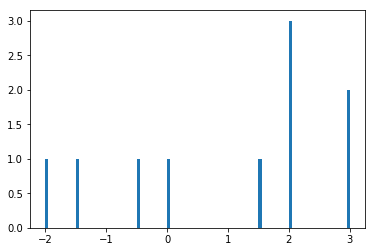

Ttest_1sampResult(statistic=-4.4371131478279224, pvalue=0.0016302879005038449)

In [91]:
plt.hist(median_list_10,100)
plt.show()
stats.ttest_1samp(median_list_10, diff_in_median, axis=0)

## 10,000 Samples

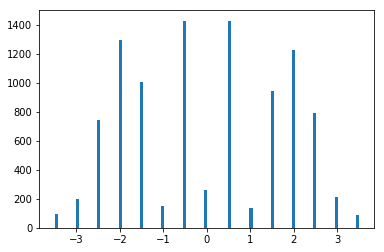

Ttest_1sampResult(statistic=-199.33131173103908, pvalue=0.0)

In [92]:
taps = list(df.Taps)
median_generator_10000 = shuffel_split_get_median(taps, 10000)
median_list_10000 = list(median_generator_10000)
plt.hist(median_list_10000,100)
plt.show()
stats.ttest_1samp(median_list_10000, diff_in_median, axis=0)

H0 has to be rejected -> There is a significant difference between the two groups 'Caffeine' and 'noCaffeine' regarding 'Taps'

# Bootstraping

In [94]:
df = pd.read_csv('BodyFat.csv', thousands=',')
df.head(15)

,Unnamed: 0,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,1,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,2,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,3,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,4,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,5,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7
5,6,22.6,54,198.00,72.00,39.9,107.6,100.0,22.0,35.9,18.9
6,7,28.7,43,200.50,71.50,37.9,107.2,103.1,23.7,32.1,18.7
7,8,21.3,42,163.00,70.25,35.3,93.5,89.6,21.9,30.7,17.4
8,9,29.9,37,241.25,71.50,42.1,119.2,110.3,24.8,34.4,18.4
9,10,21.3,41,218.50,71.00,39.8,111.7,100.5,25.2,37.5,18.7


In [95]:
df.describe()

,Unnamed: 0,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,18.601000,44.880000,177.451500,70.355000,37.894000,100.681000,91.867000,22.900000,32.292000,18.221000
std,29.011492,8.006683,11.417937,29.508013,2.714807,2.302998,8.516493,10.261235,1.346451,3.065141,0.999322
min,1.000000,3.700000,23.000000,127.500000,65.000000,32.800000,83.400000,70.400000,20.100000,25.600000,16.300000
25%,25.750000,12.375000,39.750000,152.937500,68.250000,36.275000,94.000000,83.825000,22.000000,29.900000,17.600000
50%,50.500000,18.950000,44.000000,176.125000,70.000000,37.900000,99.250000,90.150000,22.600000,32.000000,18.200000
75%,75.250000,24.575000,52.000000,195.437500,72.250000,39.400000,105.600000,98.975000,23.725000,34.400000,18.825000
max,100.000000,40.100000,74.000000,262.750000,77.750000,43.200000,128.300000,126.200000,27.000000,38.500000,21.400000


In [96]:
def bootstrap_sampling(df, N = 30, K = 10, f = np.median):
    samples = {}
    for _ in range(K):
        sample = df.sample(N).apply(f)
        keys = df.apply(np.median).keys()
        for i, statistic in enumerate(sample):
            if keys[i] not in samples:
                samples[keys[i]] = []
            samples[keys[i]].append(statistic)
    samples = {k:np.array(v) for k, v in samples.items()}
    return samples

H0: median = 13.5

In [157]:
median = 13.5
alpha = 0.05
K = 500

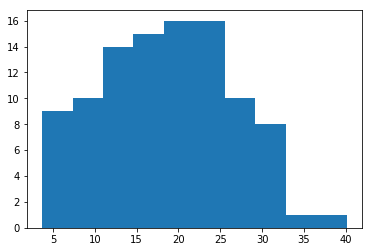

In [172]:
bootstrap = bootstrap_sampling(df, K = K, f = np.median)['Bodyfat']
shift = abs(median - np.median(df['Bodyfat']))
bootstrap = bootstrap - shift

plt.hist(df['Bodyfat'])
plt.show()

In [173]:
ordered = np.sort(bootstrap)
c = [int(K*alpha/2),  int(K*(1 - alpha)/2)]

In [174]:
calculate_p = lambda v: np.sum((bootstrap < min(v))| (bootstrap > max(v)))/float(K)
p = calculate_p([median, np.median(df['Bodyfat'])])

Reject H0 that median = 13.5

In [163]:
bootstrap

array([ 14.  ,  14.2 ,  10.3 ,  12.35,   8.9 ,  15.95,  13.75,  14.8 ,
        14.55,  11.4 ,  14.25,  12.1 ,  11.75,  13.35,  10.65,  13.5 ,
        11.3 ,  13.75,  11.1 ,  14.4 ,  15.  ,  15.95,  11.25,  14.4 ,
        12.35,  14.75,  15.  ,  13.45,  15.35,  11.65,  13.9 ,  12.35,
        13.75,  11.5 ,  12.2 ,  14.8 ,  10.25,  16.2 ,  12.2 ,  13.3 ,
        10.6 ,  15.6 ,  11.7 ,  13.45,  12.7 ,  14.45,  10.9 ,  14.35,
        12.7 ,  13.75,  11.25,  10.85,  11.05,  15.25,  13.75,  13.2 ,
        15.2 ,  15.2 ,  14.4 ,  15.15,  12.8 ,  14.95,  13.25,   8.8 ,
        11.3 ,  14.45,  14.8 ,  14.3 ,  12.7 ,  15.2 ,  13.6 ,  15.15,
        14.  ,   9.05,  12.75,  13.25,  11.35,  14.55,  13.25,  11.95,
        16.1 ,  13.1 ,  11.35,  17.05,  15.55,  11.3 ,  16.15,  15.  ,
        11.2 ,  13.25,  11.95,  14.8 ,  13.35,  15.  ,  10.3 ,  15.95,
         8.35,  12.8 ,  13.3 ,  13.4 ,  15.85,  12.85,  15.05,  13.6 ,
        13.35,  15.95,  14.2 ,  13.05,  14.8 ,  14.05,  13.35,  11.2 ,
      

In [176]:
p

0.496

In [178]:
ordered[c]

array([ 10. ,  13.3])